In [33]:
from __future__ import division
import os
import sys

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [115]:
mpl.rc('text', usetex=False)

In [34]:
rna = pd.read_csv('rnaseq_results.txt', sep='\t')
rna['expression_lfc'] = rna['log2FoldChange']
rna['logBaseMean'] = np.log10(rna['baseMean'])

ribo = pd.read_csv('riboseq_results.txt', sep='\t')
ribo['occupancy_lfc'] = ribo['log2FoldChange']
ribo['logBaseMean'] = np.log10(ribo['baseMean'])

te = pd.read_csv('te_results.txt', sep='\t')
te['efficiency_lfc'] = te['log2FoldChange']
te['logBaseMean'] = np.log10(te['baseMean'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [35]:
## Diff. expression (RNA seq.) 10% FDR
rna10fdr = rna[rna['padj']<0.1].sort_values(by='log2FoldChange')
rna10fdr.to_csv('rna10fdr_table.txt', sep='\t')
rna10fdr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,expression_lfc,logBaseMean
YNL143C,1222.475129,-7.420364,0.494599,-15.002790,7.039640e-51,4.783436e-48,-7.420364,3.087240
YOR133W,573.945367,-4.938706,0.551468,-8.955560,3.380158e-19,1.934162e-17,-4.938706,2.758871
YHR136C,217.345465,-4.878184,0.376758,-12.947806,2.417639e-38,8.213928e-36,-4.878184,2.337151
YLR154W-A,44.787791,-4.842576,0.575066,-8.420901,3.736011e-17,1.611822e-15,-4.842576,1.651160
YGL208W,87.192686,-4.672022,0.477404,-9.786313,1.289111e-22,1.001087e-20,-4.672022,1.940480


In [36]:
## Diff. occupancy (Ribo. seq.) 10% FDR
ribo10fdr = ribo[ribo['padj']<0.1].sort_values(by='log2FoldChange')
ribo10fdr.to_csv('ribo10fdr_table.txt', sep='\t')
ribo10fdr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,occupancy_lfc,logBaseMean
YOR133W,409.898822,-5.119191,0.549237,-9.320551,1.157378e-20,6.175256e-18,-5.119191,2.612677
YCL064C,175.613099,-5.042327,0.371126,-13.586562,4.811556e-42,5.776273e-39,-5.042327,2.244557
YML123C,1468.280699,-4.558623,0.268517,-16.977048,1.214429e-64,2.915845e-61,-4.558623,3.166809
YGR234W,591.047099,-4.531955,0.308755,-14.678156,8.897805e-49,1.424242e-45,-4.531955,2.771622
YGR008C,40.760979,-4.209163,0.491154,-8.569937,1.035420e-17,3.551490e-15,-4.209163,1.610245


In [37]:
## Diff. TE (combined) 10% FDR
te10fdr = te[te['padj']<0.1].sort_values(by='log2FoldChange')
te10fdr.to_csv('te10fdr_table.txt', sep='\t')
te10fdr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,efficiency_lfc,logBaseMean
YNL143C,209.256410,-11.658479,2.315086,11.921856,5.547918e-04,1.945709e-02,-11.658479,2.320679
YCR024C-B,17.307053,-10.553561,2.565324,10.213879,1.393877e-03,3.642844e-02,-10.553561,1.238223
YGL088W,848.902872,-10.330626,1.437571,145.311595,1.835858e-33,9.979722e-30,-10.330626,2.928858
YNL303W,6.825685,-9.651931,2.646126,8.466494,3.617480e-03,7.203158e-02,-9.651931,0.834146
YKR105C,7.298006,-9.257837,2.603225,11.348415,7.551238e-04,2.405203e-02,-9.257837,0.863204


In [103]:
def plot_ma(data, ax=None, low_lfc=-3, high_lfc=3, p_thres=0.1, title=None):
    if not ax:
        ax = plt.gca()
    
    ## Get points that fall in range
    base = data[data['log2FoldChange'].between(low_lfc,high_lfc)]
    baseNotSig = base[base['padj']>=p_thres]
    baseSig = base[base['padj']<p_thres]
    
    ## Get points out of range
    low = data[data['log2FoldChange']<low_lfc]
    lowNotSig = low[low['padj']>=p_thres]
    lowSig = low[low['padj']<p_thres]
    
    high = data[data['log2FoldChange']>high_lfc]
    highNotSig = high[high['padj']>=p_thres]
    highSig = high[high['padj']<p_thres]
    
    ## Plot
    ax.scatter(baseNotSig['logBaseMean'], baseNotSig['log2FoldChange'], edgecolor='none', c='k', s=5)
    ax.scatter(baseSig['logBaseMean'], baseSig['log2FoldChange'], edgecolor='none', c='r', s=5)
    
    ax.scatter(lowNotSig['logBaseMean'], np.maximum(low_lfc, lowNotSig['log2FoldChange']), edgecolor='k', marker='v', c='none', s=20)
    ax.scatter(lowSig['logBaseMean'], np.maximum(low_lfc, lowSig['log2FoldChange']), edgecolor='r', marker='v', c='none', s=20)
    
    ax.scatter(highNotSig['logBaseMean'], np.minimum(high_lfc, highNotSig['log2FoldChange']), edgecolor='k', marker='^', c='none', s=20)
    ax.scatter(highSig['logBaseMean'], np.minimum(high_lfc, highSig['log2FoldChange']), edgecolor='r', marker='^', c='none', s=20)
    
    ax.axhline(0, linewidth=3, c='r', alpha=0.5, zorder=6)
    
    ax.set_xlim(-1,5)
    ax.set_ylim(low_lfc-0.2,high_lfc+0.2)
    
    xticks = ax.get_xticks()
    ax.set_xticklabels(['10$^{%d}$' % int(x) for x in xticks])
    
    ax.set_xlabel('Mean of normalized counts')
    ax.set_ylabel('Log$_{2}$ fold change')
    if title:
        ax.set_title(title)

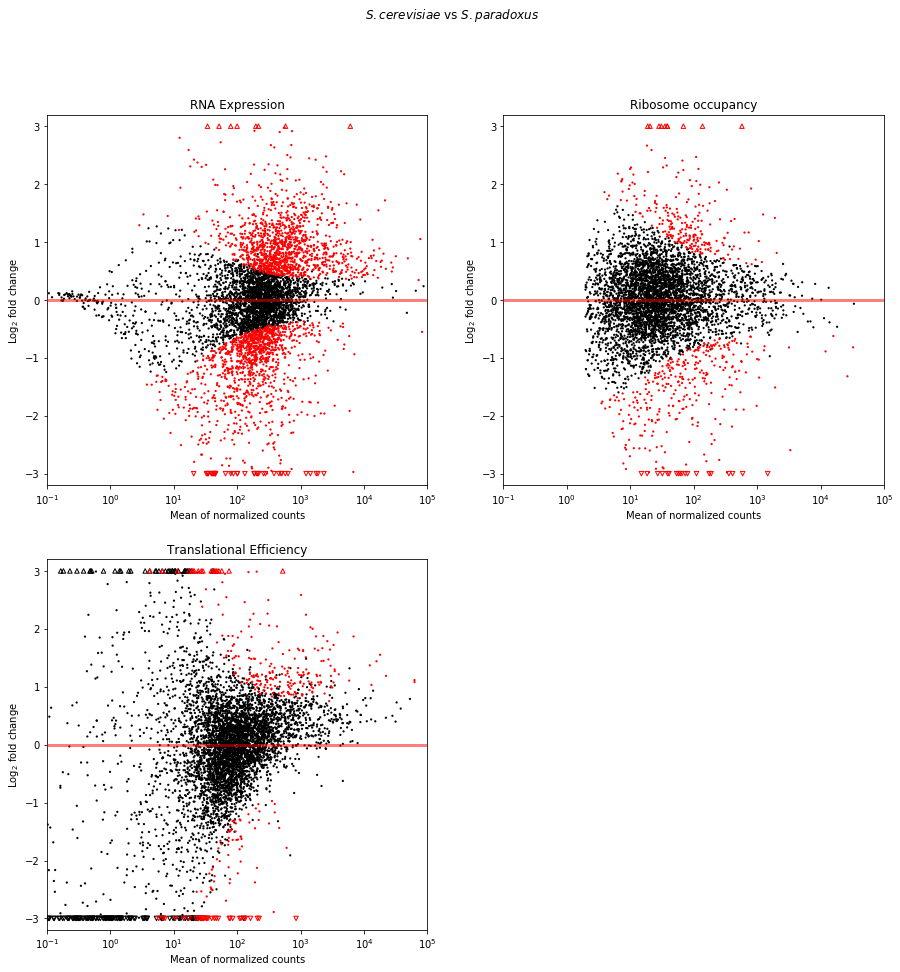

In [124]:
data = [rna,ribo,te]
titles = ['RNA Expression', 'Ribosome occupancy', 'Translational Efficiency']

fig,axesArray = plt.subplots(2,2, figsize=(15,15), facecolor='#FFFFFF')
axes = np.ndarray.flatten(axesArray)

for i,(df,title) in enumerate(zip(data,titles)):
    plot_ma(df, ax=axes[i], title=title)

for ax in axes[len(data):]:
    ax.axis('off')
    
fig.suptitle(r'$\it{S.cerevisiae}$ vs $\it{S.paradoxus}$')